# Project Topic: Correlation between No. of Doctors and Child Mortality Rate

<p><font color = "blue">Part (I): Problem Statement / Research Topic </font></p>

We are interested to find out the impact of the number of doctors available per 1000 pax in ASEAN region on its child mortality rates.

<p>In an increasingly globalised world, we see a widening income divide among people in various countries of the world. Specifically, comparing between a developed country and a developing country. In our case, we would be interested in making a comparison between developing countries like Thailand versus developed countries like Singapore in the ASEAN region. Furthermore, we would like to investigate and see if the difference in the number of doctors available in each country has an impact on child mortality rates.</p>

<p><font color = "blue">Part (II): Dataset and Data Preparation </font></p>

The datasets are retrieved from Gapminder (https://www.gapminder.org/data/). 

Datasets used: 

1. Number of doctors per 1000 pax (https://www.gapminder.org/data/)

2. Child mortality rate (https://www.gapminder.org/data/documentation/gd005/)

The first dataset shows the number of doctors per 1000 pax across different countries. It includes observations from the year 1960 to 2018. It is provided in both csv and xlsx formats. 

The second dataset shows the death of children under five years of age per 1,000 live births across 195 countries. It includes observations from the year 1800 to 2100. It is provided in both csv and xlsx formats. 

For our analysis, we would be focusing on data ranging from 2009 - 2018.


<p><font color = "blue">Part (III): Methodology </font></p>

The first thing we did was to filter each of the dataset and keep only the countries within the ASEAN Region. After which, we only retained data from 2009 - 2018 which is the timeframe we are looking at for analysis.

For dataset (1): Number of doctors per 1000 pax, we discovered that for Phillipnes there were missing values in the year 2014 and 2016, using the isnull() function. Then, we filled the missing values with the average value across the 10 years for Phillipnes. This is so that we can draw a meaningful analysis across the years and avoid any anomolies when plotting the graph.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [2]:
#raw dataset
medical_doc_df = pd.read_csv("medical_doctors_per_1000_people.csv")
medical_doc_df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.213,0.236,0.252,0.241,0.285,0.298,0.285,0.278,NaN,NaN
1,Albania,0.276,NaN,NaN,NaN,NaN,0.481,NaN,NaN,NaN,...,1.230,1.230,1.220,1.270,1.280,NaN,NaN,1.220,NaN,NaN
2,Algeria,0.173,NaN,NaN,NaN,NaN,0.116,NaN,NaN,NaN,...,NaN,1.210,NaN,NaN,NaN,NaN,NaN,1.830,1.790,1.72
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.150,4.000,NaN,NaN,NaN,NaN,3.330,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,0.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215,NaN


In [3]:
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Lao', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand',  'Vietnam']
ASEAN_doc_df = medical_doc_df[medical_doc_df.country.isin(ASEAN)]
doc_ASEAN_years_df = ASEAN_doc_df[['country','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
doc_ASEAN_years_df

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
24,Brunei,1.160,1.450,1.540,1.490,1.620,1.510,1.780,1.732,1.610,1.488
28,Cambodia,0.238,0.230,0.226,0.165,0.476,0.193,0.290,0.299,0.308,0.318
76,Indonesia,0.145,0.140,0.135,0.307,0.312,0.317,0.274,0.231,0.377,0.427
90,Lao,0.197,0.781,0.510,0.180,0.449,0.495,0.541,0.587,0.373,0.159
100,Malaysia,1.100,1.170,1.280,1.330,1.380,1.430,1.540,1.610,1.690,1.770
115,Myanmar,0.488,0.522,0.551,0.580,0.609,0.638,0.667,0.620,0.864,0.677
135,Philippines,1.260,1.270,1.210,1.120,1.070,NaN,0.810,NaN,0.600,0.600
150,Singapore,1.680,1.720,1.720,1.800,1.900,2.010,2.120,2.290,2.460,2.630
170,Thailand,0.339,0.391,0.413,0.443,0.474,0.505,0.465,0.445,0.807,0.805
188,Vietnam,0.698,0.710,1.150,0.821,1.180,0.783,0.796,0.828,0.860,0.892


In [4]:
is_NaN = doc_ASEAN_years_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = doc_ASEAN_years_df[row_has_NaN]
rows_with_NaN

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
135,Philippines,1.26,1.27,1.21,1.12,1.07,NaN,0.81,NaN,0.6,0.6


In [5]:
doc_ASEAN_years_df = doc_ASEAN_years_df.transpose().fillna(doc_ASEAN_years_df.mean(axis=1)).transpose()
doc_ASEAN_years_df

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
24,Brunei,1.16,1.45,1.54,1.49,1.62,1.51,1.78,1.732,1.61,1.488
28,Cambodia,0.238,0.23,0.226,0.165,0.476,0.193,0.29,0.299,0.308,0.318
76,Indonesia,0.145,0.14,0.135,0.307,0.312,0.317,0.274,0.231,0.377,0.427
90,Lao,0.197,0.781,0.51,0.18,0.449,0.495,0.541,0.587,0.373,0.159
100,Malaysia,1.1,1.17,1.28,1.33,1.38,1.43,1.54,1.61,1.69,1.77
115,Myanmar,0.488,0.522,0.551,0.58,0.609,0.638,0.667,0.62,0.864,0.677
135,Philippines,1.26,1.27,1.21,1.12,1.07,0.9925,0.81,0.9925,0.6,0.6
150,Singapore,1.68,1.72,1.72,1.8,1.9,2.01,2.12,2.29,2.46,2.63
170,Thailand,0.339,0.391,0.413,0.443,0.474,0.505,0.465,0.445,0.807,0.805
188,Vietnam,0.698,0.71,1.15,0.821,1.18,0.783,0.796,0.828,0.86,0.892


For dataset (2): Child Mortality Rate, there was no missing values for the ASEAN Region, hence we only filtered by countries and for the years of 2009-2018.

In [6]:
#raw dataset
child_mortality_df = pd.read_csv("child_mortality_0_5_year_olds_dying_per_1000_born.csv")
child_mortality_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


In [7]:
#filtered data
ASEAN_child_mortality_df = child_mortality_df[child_mortality_df.country.isin(ASEAN)]
mortality_ASEAN_years_df = ASEAN_child_mortality_df[['country','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
mortality_ASEAN_years_df

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
24,Brunei,9.55,9.66,9.80,9.99,10.20,10.50,10.80,11.10,11.40,11.60
28,Cambodia,47.90,44.30,41.00,38.00,35.60,33.70,32.00,30.50,29.20,28.00
77,Indonesia,35.50,34.10,32.80,31.50,30.30,29.10,28.00,26.90,25.90,25.00
91,Lao,71.50,68.10,64.80,61.80,58.90,56.10,53.60,51.30,49.30,47.30
102,Malaysia,7.91,7.94,7.95,7.96,7.98,8.00,8.00,7.96,7.89,7.78
117,Myanmar,66.00,63.30,60.70,58.20,55.80,53.60,51.60,49.70,47.90,46.20
137,Philippines,32.40,32.00,31.60,31.20,30.90,30.50,30.10,29.70,29.10,28.40
152,Singapore,2.83,2.81,2.79,2.75,2.72,2.71,2.72,2.75,2.79,2.81
173,Thailand,14.00,13.30,12.70,12.10,11.50,11.00,10.50,9.98,9.52,9.10
191,Vietnam,23.40,23.10,22.80,22.60,22.30,22.10,21.80,21.50,21.10,20.70


Text(0, 0.5, 'Child Mortality Rate per 1000 pax')

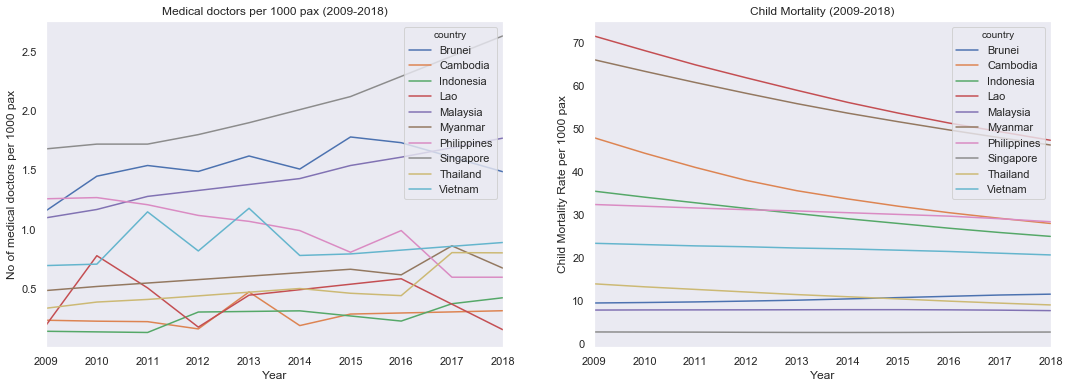

In [8]:
fig = plt.figure(figsize = (18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

doc_ASEAN_years_df.set_index('country').T.plot(ax=ax1,grid=False)
ax1.set_title('Medical doctors per 1000 pax (2009-2018)')
ax1.set_xlabel('Year')
ax1.set_ylabel('No of medical doctors per 1000 pax')

mortality_ASEAN_years_df.set_index('country').T.plot(ax=ax2,grid=False)
ax2.set_title('Child Mortality (2009-2018)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Child Mortality Rate per 1000 pax')

In [9]:
thai_doc = doc_ASEAN_years_df[doc_ASEAN_years_df['country']=='Thailand']
thai_mortality = mortality_ASEAN_years_df[mortality_ASEAN_years_df['country']=='Thailand']
display(thai_doc)
display(thai_mortality)

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
170,Thailand,0.339,0.391,0.413,0.443,0.474,0.505,0.465,0.445,0.807,0.805


,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
173,Thailand,14.0,13.3,12.7,12.1,11.5,11.0,10.5,9.98,9.52,9.1


In [10]:
sg_doc = doc_ASEAN_years_df[doc_ASEAN_years_df['country']=='Singapore']
sg_mortality = mortality_ASEAN_years_df[mortality_ASEAN_years_df['country']=='Singapore']
display(sg_doc)
display(sg_mortality)

,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
150,Singapore,1.68,1.72,1.72,1.8,1.9,2.01,2.12,2.29,2.46,2.63


,country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
152,Singapore,2.83,2.81,2.79,2.75,2.72,2.71,2.72,2.75,2.79,2.81


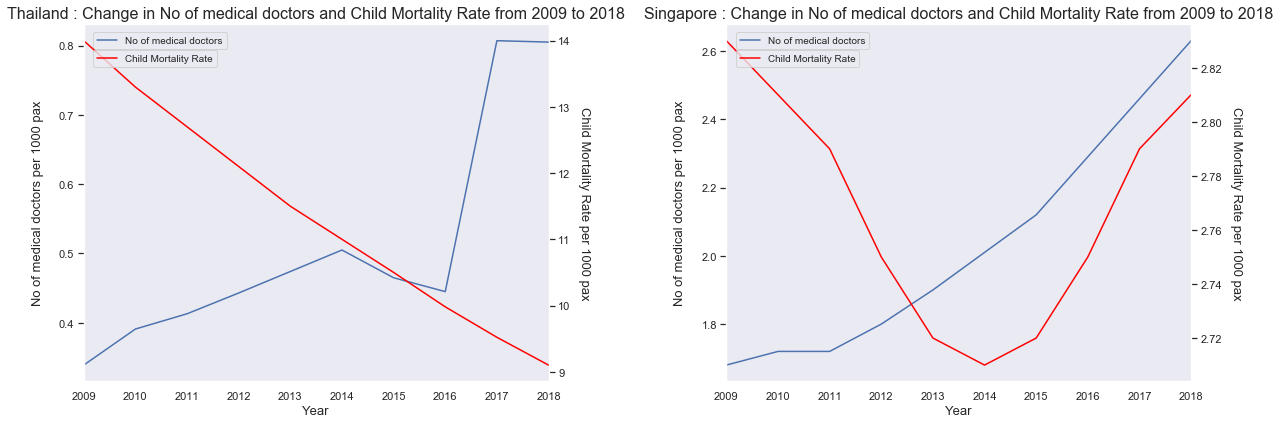

In [11]:
#Thailand
fig = plt.figure(figsize = (18,6))
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()

thai_doc.set_index('country').T.plot(ax=ax1,grid=False)
thai_mortality.set_index('country').T.plot(ax=ax2, color = 'red',grid=False)

ax1.set_ylabel('No of medical doctors per 1000 pax', fontsize = 13, labelpad = 15)
ax2.set_ylabel('Child Mortality Rate per 1000 pax', fontsize = 13, rotation = 270, labelpad = 20)
ax1.set_xlabel('Year', fontsize = 13)

ax1.legend(['No of medical doctors'], fontsize = 10, loc = (0.02,0.93))
ax2.legend(['Child Mortality Rate'], fontsize = 10, loc = (0.02,0.88))

ax1.set_title('Thailand : Change in No of medical doctors and Child Mortality Rate from 2009 to 2018', fontsize = 16)

#SG
ax3 = fig.add_subplot(122)
ax4 = ax3.twinx()

sg_doc.set_index('country').T.plot(ax=ax3,grid=False)
sg_mortality.set_index('country').T.plot(ax=ax4, color = 'red',grid=False)

ax3.set_ylabel('No of medical doctors per 1000 pax', fontsize = 13, labelpad = 15)
ax4.set_ylabel('Child Mortality Rate per 1000 pax', fontsize = 13, rotation = 270, labelpad = 20)
ax3.set_xlabel('Year', fontsize = 13)

ax3.legend(['No of medical doctors'], fontsize = 10, loc = (0.02,0.93))
ax4.legend(['Child Mortality Rate'], fontsize = 10, loc = (0.02,0.88))

ax3.set_title('Singapore : Change in No of medical doctors and Child Mortality Rate from 2009 to 2018', fontsize = 16)
plt.tight_layout()

The EDA techniques used by our team was Multivariate analysis via data visualization.
This was done to analyse the relationship between number of doctors available per 1000 pax in ASEAN region and child mortality rate. 

Our hypothesis is to observe an inverse correlation between those 2 variables. This was validated by the results we obtained, further details will be discussed in Part IV.

For the data visualisation technique, we tried plotting with pandas and made use of the .plot() function. Also, to ensure readability, we have included the chart titles, x & y labels and a legend.


<p><font color = "blue">Part (IV): Insights/Evaluation </font></p>

Based on our analysis, we found out that Singapore, which had the highest number of doctors per 1000 pax, had in fact the lowest rate of child mortality. This goes to show that as a developed country, Singapore is better able to invest in its healthcare system, more specifically into the training of new doctors. Thus, it is able to keep its child mortality rate low.

On the other hand, Thailand, which had a substantially lower number of doctors per 1000 pax, had a higher child mortality rate. This could be attributed to the country’s limited ability to invest in the improvement of its healthcare system to keep child mortality rates low.

Moreover, this difference in level of healthcare systems showcases the stark income divide between developed countries like Singapore and developing countries like Thailand, where we see fewer doctors available to treat patients in the country as compared to Singapore. This greatly impacts mortality rates as the accessibility to healthcare directly impacts the survival rate of an ill individual.

Our team believes that this report could open doors for opportunity into:

1. Research of whether developing countries like Thailand could implement more healthcare support systems to enhance child mortality rates in the country
2. Research of the cause and effect of a huge income divide between countries in the ASEAN region and what more could countries do to narrow this income divide

With COVID-19, this issue may become even more imminent as healthcare systems become overwhelmed and will soon face a shortage of doctors. This would mean that child mortality rates may rise as a result and income gaps between developing and developed countries will further widen. Thus, we hope to be able to draw more awareness into possible ways of improving the widening income gap between these countries.


<hr>

<center><h3>Grading</h3></center>

<div class="alert alert-info"><b>Congratulations on the completion of your project, and the course!</b>
    <br>Below is the grade for the project:</div>
<table>
<tr>
    <th>Criteria</th><th>Mark</th>
</tr>
<tr>
    <td>I. Problem Statement / Research Topic</td><td>2 / 2</td>
</tr>  
<tr>
    <td>II. Dataset / Data Prep</td><td>2 / 2</td>
</tr>   
<tr>
    <td>III. Methodology</td><td>1.5 / 3</td>
</tr>   
<tr>
    <td>IV. Insights / Evaluation</td><td>2 / 3</td>
</tr> 
<tr>
    <th>Total Mark</th><th>7.5 / 10</th>
</tr>
</table>
<h3>Further comments:</h3>

* <b>Data Prep</b>: For filling up missing data in time series (like Phillippines' data), a common technique is interpolation. For example, to fill the NaN between 1.07 and 0.81, you could simply take the average between these 2 numbers, not the entire series. Doing this will remove the "bump" you discovered in Phillippines' line for # of docs. 


* <b>Insights</b>: One interesting aspect you guys could've looked into further, if given more time, is the explanation on the number of doctors - not every country experienced a steady increase in doctor numbers over the years. Could this be because of increasing population or lack of investment in healthcare budget? These are worth looking into. 